# Week 2 - Search Algorithms
## EAI 6000 / Spring A / 2023

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
from collections import deque

## Part 1

In [2]:
def f(x):
    return np.sin(x)*np.exp(x)

In [3]:
# define xmin and xmax
xmin = 2
xmax = 4

In [4]:
# define a list of 1000 values of x within the given range.
x_arr = np.linspace(xmin, xmax, 1000)

# find the values of f(x) for all values in x_arr
y_arr = f(x_arr)

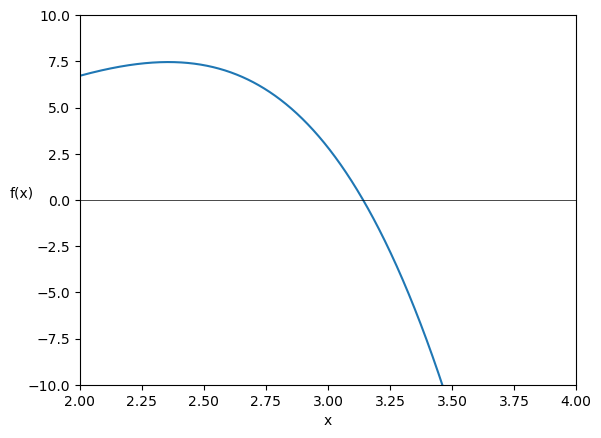

In [5]:
# Plot the function to visualize the root

plt.plot(x_arr, y_arr)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)', rotation = 0)
plt.xlim(2, 4)
plt.ylim(-10, 10)

# Display the plot
plt.show()

In [6]:
# write your code below



## Part 2

### function definitions

In [7]:
# Define the function to find neighbor nodes
def find_neighbors(node, grid):
    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue  # ignore the current node
            x, y = node[0] + dx, node[1] + dy
            if x < 0 or x >= len(grid) or y < 0 or y >= len(grid[0]):
                continue  # ignore nodes outside the grid
            if grid[x][y] == 'X':
                continue  # ignore obstacles
            neighbors.append((x, y))
    return neighbors


In [8]:

def breadth_first_search(grid, start, stop, obstacles):
    # Initialize the queue and visited set
    queue = deque([start])
    visited = set([start])

    # Keep track of the paths
    paths = {start: []}

    # Loop until the queue is empty
    while queue:
        # Get the next node from the queue
        current = queue.popleft()

        # Check if we've reached the goal node
        if current == stop:
            path = paths[current] + [current]
            return path

        # Check the neighbors of the current node
        for neighbor in find_neighbors(current, grid):
            if neighbor in visited or neighbor in obstacles:
                continue  # ignore nodes in the visited set or obstacles

            # Add the neighbor to the queue and visited set
            queue.append(neighbor)
            visited.add(neighbor)

            # Update the path to the neighbor
            paths[neighbor] = paths[current] + [current]

    # If we get here, there is no path from start to stop
    print("No path found")
    return None


In [9]:
def depth_first_search(grid, start, stop, obstacles):
    # Initialize the stack and visited set
    stack = [start]
    visited = set([start])

    # Keep track of the paths
    paths = {start: []}

    # Loop until the stack is empty
    while stack:
        # Get the next node from the stack
        current = stack.pop()

        # Check if we've reached the goal node
        if current == stop:
            path = paths[current] + [current]
            return path

        # Check the neighbors of the current node
        for neighbor in find_neighbors(current, grid):
            if neighbor in visited or neighbor in obstacles:
                continue  # ignore nodes in the visited set or obstacles

            # Add the neighbor to the stack and visited set
            stack.append(neighbor)
            visited.add(neighbor)

            # Update the path to the neighbor
            paths[neighbor] = paths[current] + [current]

    # If we get here, there is no path from start to stop
    print("No path found")
    return None


In [10]:
def make_obstacles(GRID_SIZE, num_obstacles, start, stop):
    
    # Generate a set of random obstacle coordinates
    obstacles = set()
    while len(obstacles) < num_obstacles:
        obstacle = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        if obstacle != start and obstacle != stop:
            obstacles.add(obstacle)
    
    return obstacles

def make_grid(GRID_SIZE, obstacles):
    # Create the grid
    grid = []
    for i in range(GRID_SIZE):
        row = []
        for j in range(GRID_SIZE):
            if (i, j) == start:
                row.append('S')
            elif (i, j) == stop:
                # row.append('E')
                row.append('E')
            elif (i, j) in obstacles:
                row.append('\u25A0')
                # row.append('\u2B1B')
                # row.append('\u2B15')
            else:
                row.append('.')
                # row.append('\u00B7')
                # row.append(' ')
                # row.append('\u00A0\u2022\u00A0')
        grid.append(row)

    return grid

def draw_grid(grid):

    # Print the grid
    for row in grid:
        print(' '.join(row))
        
def update_grid(grid, path):
    
    gridup = copy.deepcopy(grid)
    
    # Mark the path on the grid
    if path is not None:
        for node in path:
            x, y = node
            if gridup[x][y] != 'S' and gridup[x][y] != 'E':
                gridup[x][y] = '○' #'\u2B55' #'\u25EF' #'\u25CB' #'*'
                
    return gridup

### generate grid, start and stop, and obstacles

In [11]:

# Define the dimensions of the grid
GRID_SIZE = 15

# randomize the start and stop nodes
start = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
stop  = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

# or actually just fix the start and end points. 
start = (0, 0)
stop  = (GRID_SIZE-1, GRID_SIZE-1)

# Define the number of obstacles, which is related to the grid size. 
# feel free to adjust the parameters in the formula to produce more or less obstacles
num_obstacles = random.randint(int(GRID_SIZE*GRID_SIZE/4), int(GRID_SIZE*GRID_SIZE/2))



In [13]:
# create a grid and draw it

obstacles = make_obstacles(GRID_SIZE, num_obstacles, start, stop)
mygrid    = make_grid(GRID_SIZE, obstacles)
draw_grid(mygrid)


S . ■ . . ■ . ■ . . . . . ■ .
. ■ . . . . . ■ . . . . . . .
. . . . ■ . ■ . . . . . ■ . ■
■ . ■ ■ . . ■ ■ . . ■ . . . ■
■ . ■ . . ■ . . . . . ■ . . ■
. ■ . . . . ■ . . ■ ■ ■ ■ . .
■ . . . ■ . ■ ■ ■ ■ . ■ . . .
. . . . . . . ■ ■ . . ■ . ■ ■
■ . ■ . . ■ . . . . . . . ■ .
. . ■ . ■ ■ . . . . . . ■ . ■
■ ■ . . . . ■ ■ . . . ■ . . .
■ . . . . . . . . . . . . . ■
. . ■ . . . . ■ ■ . . . . . .
. . . . . . . . ■ . ■ . ■ . .
. . ■ ■ . . . ■ . . ■ . ■ . E


### depth-first search

In [14]:
path_DF = depth_first_search(mygrid, start, stop, obstacles)
grid_DF = update_grid(mygrid, path_DF)
draw_grid(grid_DF)

S . ■ . . ■ . ■ . . . . . ■ .
○ ■ . . . . . ■ . . . . . . .
. ○ . . ■ . ■ . . . . . ■ . ■
■ ○ ■ ■ . . ■ ■ . . ■ . . . ■
■ ○ ■ . . ■ . . . . . ■ . . ■
. ■ ○ . . . ■ . . ■ ■ ■ ■ . .
■ . . ○ ■ . ■ ■ ■ ■ . ■ . . .
. . . . ○ . . ■ ■ . . ■ . ■ ■
■ . ■ . ○ ■ . . . . . . . ■ .
. . ■ ○ ■ ■ . . . . . . ■ . ■
■ ■ . . ○ . ■ ■ . . . ■ . . .
■ . . . . ○ . . . . . . . . ■
. . ■ . . . ○ ■ ■ . ○ . ○ . .
. . . . . . . ○ ■ ○ ■ ○ ■ ○ .
. . ■ ■ . . . ■ ○ . ■ . ■ . E


### breadth-first search

In [89]:
path_BF = breadth_first_search(mygrid, start, stop, obstacles)
grid_BF = update_grid(mygrid, path_BF)
draw_grid(grid_BF)

S ○ ○ ○ ■ . . . . . ■ . ■ . .
■ ■ ■ . ○ ○ ■ . ■ ■ . . . ■ .
. ■ ■ . ■ ■ ○ . ■ . . ■ . ■ ■
. . ■ . . ■ ○ . . . . . . ■ .
. . . . . . . ○ . . . ■ . . ■
. . . . . ■ ■ ■ ○ . . . ■ ■ ■
. . . . . ■ . ○ . ■ . ■ ■ . ■
■ . . . . . ■ ■ ○ . . ■ . . ■
. . . ■ . ■ ■ ■ . ○ ■ . . ■ .
. . . ■ . . ■ . ■ ■ ○ ■ . . .
■ . ■ . . ■ . . ■ ■ ○ ■ . ■ .
. . . . . ■ . . ■ . ■ ○ ■ ■ .
. . ■ . ■ ■ ■ . . . ■ ○ ■ . ■
■ ■ . . ■ ■ . ■ . . . ■ ○ ○ .
. ■ . ■ ■ ■ . . . . ■ ■ ■ ■ E
